In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
from sklearn.model_selection import train_test_split

In [2]:
dataset = np.array([[3.63636364e+00,1.09036800e+00,0], [4.09090909e+00,2.28173256e+00,0], [1.01010101e-01,1.31203345e+00,1], [4.54545455e-01,1.98982144e+00,1], [1.91919192e+00,1.74885201e+00,0], [1.76767677e+00,3.33230999e-01,1], [2.57575758e+00,2.97181157e+00,0], [1.06060606e+00,8.10748756e-01,1], [2.97979798e+00,1.06342392e+00,1], [1.86868687e+00,1.59906946e+00,0], [4.29292929e+00,2.79576184e+00,0], [4.39393939e+00,2.94500082e+00,0], [2.97979798e+00,2.06342392e+00,0], [2.37373737e+00,2.92235429e+00,0], [2.17171717e+00,1.51367739e+00,1], [2.67676768e+00,2.84972543e+00,0], [3.68686869e+00,1.67430145e-01,1], [5.05050505e-01,1.99987413e+00,1], [7.57575758e-01,2.69007901e+00,0], [1.46464646e+00,1.00616154e+00,0], [4.14141414e+00,2.42979491e+00,0], [1.71717172e+00,1.22385354e+00,0], [4.34343434e+00,1.88145336e+00,1], [3.53535354e-01,2.89599377e+00,0], [3.33333333e+00,1.33974596e-01,1], [1.46464646e+00,6.16153554e-03,1], [1.66666667e+00,1.33974596e-01,1], [4.74747475e+00,2.71269417e+00,0], [2.32323232e+00,1.84972543e+00,1], [4.14141414e+00,1.42979491e+00,1], [3.88888889e+00,1.65797986e+00,0], [1.51515152e-01,2.45822652e+00,0], [2.77777778e+00,2.64278761e+00,0], [1.21212121e+00,3.81841014e-01,1], [3.83838384e+00,5.13803264e-01,1], [3.68686869e+00,1.16743015e+00,0], [2.57575758e+00,1.97181157e+00,1], [4.09090909e+00,1.28173256e+00,1], [2.12121212e+00,1.37166246e+00,1], [3.18181818e+00,4.59359183e-01,1], [4.49494949e+00,1.99987413e+00,1], [1.31313131e+00,1.16743015e+00,0], [4.64646465e+00,2.89599377e+00,0], [2.52525253e+00,1.99685478e+00,1], [1.41414141e+00,3.61578414e-02,1], [3.23232323e+00,3.33230999e-01,1], [2.27272727e+00,1.75574957e+00,1], [2.17171717e+00,2.51367739e+00,0], [1.16161616e+00,5.13803264e-01,1], [2.82828283e+00,2.51367739e+00,0], [2.27272727e+00,2.75574957e+00,0], [3.33333333e+00,1.13397460e+00,0], [3.13131313e+00,1.59906946e+00,0], [2.02020202e+00,2.06342392e+00,0], [3.48484848e+00,1.13266082e-03,1], [5.05050505e-01,2.99987413e+00,0], [4.04040404e+00,1.12659245e+00,1], [3.78787879e+00,3.81841014e-01,1], [1.41414141e+00,1.03615784e+00,0], [1.26262626e+00,2.65408291e-01,1], [3.28282828e+00,2.23853536e-01,1], [4.69696970e+00,2.81457595e+00,0], [2.62626263e+00,1.92235429e+00,1], [1.71717172e+00,2.23853536e-01,1], [5.05050505e-02,2.15800140e+00,0], [3.03030303e+00,1.90494396e+00,0], [2.92929293e+00,1.22031053e+00,1], [7.57575758e-01,1.69007901e+00,1], [2.77777778e+00,1.64278761e+00,1], [1.11111111e+00,6.57979857e-01,1], [3.08080808e+00,1.74885201e+00,0], [2.87878788e+00,2.37166246e+00,0], [2.07070707e+00,1.22031053e+00,1], [2.52525253e-01,2.71269417e+00,0], [3.53535354e-01,1.89599377e+00,1], [2.02020202e+00,1.06342392e+00,1], [5.05050505e-02,1.15800140e+00,1], [3.58585859e+00,1.03615784e+00,0], [1.01010101e-01,2.31203345e+00,0], [0.00000000e+00,1.00000000e+00,1], [6.56565657e-01,1.88145336e+00,1], [4.24242424e+00,1.69007901e+00,1], [4.69696970e+00,1.81457595e+00,1], [9.09090909e-01,2.28173256e+00,0], [9.09090909e-01,1.28173256e+00,1], [4.54545455e+00,1.98982144e+00,1], [2.87878788e+00,1.37166246e+00,1], [3.38383838e+00,6.58521397e-02,1], [9.59595960e-01,2.12659245e+00,0], [7.07070707e-01,2.79576184e+00,0], [1.01010101e+00,9.68272067e-01,1], [2.12121212e+00,2.37166246e+00,0], [4.59595960e+00,1.95490224e+00,1], [1.61616162e+00,6.58521397e-02,1], [2.42424242e+00,2.97181157e+00,0], [5.00000000e+00,2.00000000e+00,0], [2.07070707e+00,2.22031053e+00,0], [3.53535354e+00,1.00616154e+00,0], [1.36363636e+00,1.09036800e+00,0], [4.44444444e+00,2.98480775e+00,0], [3.38383838e+00,1.06585214e+00,0], [4.04040404e-01,1.95490224e+00,1], [6.06060606e-01,2.94500082e+00,0], [1.86868687e+00,5.99069465e-01,1], [1.06060606e+00,1.81074876e+00,0], [4.94949495e+00,2.15800140e+00,0], [1.16161616e+00,1.51380326e+00,0], [8.58585859e-01,1.42979491e+00,1], [2.22222222e+00,2.64278761e+00,0], [2.22222222e+00,1.64278761e+00,1], [4.79797980e+00,1.59290793e+00,1], [2.82828283e+00,1.51367739e+00,1], [3.43434343e+00,1.02119755e+00,0], [4.54545455e+00,2.98982144e+00,0], [8.08080808e-01,2.56705986e+00,0], [2.37373737e+00,1.92235429e+00,1], [2.52525253e-01,1.71269417e+00,1], [3.48484848e+00,1.00113266e+00,0], [3.83838384e+00,1.51380326e+00,0], [4.89898990e+00,1.31203345e+00,1], [9.59595960e-01,1.12659245e+00,1], [4.94949495e+00,1.15800140e+00,1], [1.51515152e-01,1.45822652e+00,1], [4.04040404e+00,2.12659245e+00,0], [4.59595960e+00,2.95490224e+00,0], [1.56565657e+00,1.02119755e+00,0], [4.04040404e-01,2.95490224e+00,0], [1.96969697e+00,9.04943957e-01,1], [4.64646465e+00,1.89599377e+00,1], [8.58585859e-01,2.42979491e+00,0], [4.19191919e+00,1.56705986e+00,1], [3.18181818e+00,1.45935918e+00,0], [3.73737374e+00,1.26540829e+00,0], [2.02020202e-01,1.59290793e+00,1], [3.08080808e+00,7.48852013e-01,1], [3.88888889e+00,6.57979857e-01,1], [1.56565657e+00,2.11975538e-02,1], [4.89898990e+00,2.31203345e+00,0], [3.28282828e+00,1.22385354e+00,0], [3.73737374e+00,2.65408291e-01,1], [3.98989899e+00,9.68272067e-01,1], [2.42424242e+00,1.97181157e+00,1], [3.53535354e+00,6.16153554e-03,1], [2.47474747e+00,1.99685478e+00,1], [1.26262626e+00,1.26540829e+00,0], [0.00000000e+00,2.00000000e+00,0], [1.11111111e+00,1.65797986e+00,0], [1.01010101e+00,1.96827207e+00,0], [3.23232323e+00,1.33323100e+00,0], [1.51515152e+00,1.13266082e-03,1], [2.92929293e+00,2.22031053e+00,0], [2.32323232e+00,2.84972543e+00,0], [1.91919192e+00,7.48852013e-01,1], [2.72727273e+00,1.75574957e+00,1], [4.19191919e+00,2.56705986e+00,0], [6.56565657e-01,2.88145336e+00,0], [3.43434343e+00,2.11975538e-02,1], [1.81818182e+00,1.45935918e+00,0], [3.93939394e+00,8.10748756e-01,1], [3.93939394e+00,1.81074876e+00,0], [4.74747475e+00,1.71269417e+00,1], [3.58585859e+00,3.61578414e-02,1], [1.76767677e+00,1.33323100e+00,0], [3.98989899e+00,1.96827207e+00,0], [1.31313131e+00,1.67430145e-01,1], [5.00000000e+00,1.00000000e+00,1], [1.81818182e+00,4.59359183e-01,1], [1.36363636e+00,9.03680046e-02,1], [3.13131313e+00,5.99069465e-01,1], [2.47474747e+00,2.99685478e+00,0], [5.55555556e-01,1.98480775e+00,1], [4.24242424e+00,2.69007901e+00,0], [4.49494949e+00,2.99987413e+00,0], [4.34343434e+00,2.88145336e+00,0], [4.79797980e+00,2.59290793e+00,0], [1.66666667e+00,1.13397460e+00,0], [4.44444444e+00,1.98480775e+00,1], [1.61616162e+00,1.06585214e+00,0], [3.78787879e+00,1.38184101e+00,0], [4.54545455e-01,2.98982144e+00,0], [4.29292929e+00,1.79576184e+00,1], [2.67676768e+00,1.84972543e+00,1], [8.08080808e-01,1.56705986e+00,1], [3.03030303e-01,1.81457595e+00,1], [3.03030303e-01,2.81457595e+00,0], [1.96969697e+00,1.90494396e+00,0], [6.06060606e-01,1.94500082e+00,1], [3.63636364e+00,9.03680046e-02,1], [1.51515152e+00,1.00113266e+00,0], [1.21212121e+00,1.38184101e+00,0], [5.55555556e-01,2.98480775e+00,0], [4.84848485e+00,1.45822652e+00,1], [7.07070707e-01,1.79576184e+00,1], [2.52525253e+00,2.99685478e+00,0], [4.39393939e+00,1.94500082e+00,1], [2.72727273e+00,2.75574957e+00,0], [2.62626263e+00,2.92235429e+00,0], [4.84848485e+00,2.45822652e+00,0], [2.02020202e-01,2.59290793e+00,0], [3.03030303e+00,9.04943957e-01,1]])

In [3]:
dataset.shape

(200, 3)

In [4]:
X = dataset[:,:2]
y = dataset[:,-1]

In [5]:
X.shape, y.shape

((200, 2), (200,))

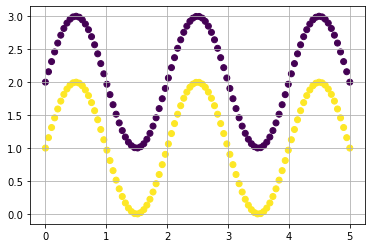

In [6]:
plt.grid()
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

y_train[y_train==0] = -1
y_test[y_test==0] = -1

Perform the SVM classification using our scratch code; put it into class, and allows users to use soft or hard margin

In [18]:
import cvxopt
class SVM:
        
    def linear(self, x, z):
        return np.dot(x, z)
    
    def polynomial(self, x, z, p=5):
        return (1 + np.dot(x, z)) ** p
    
    def gaussian(self, x, z, sigma=0.1):
        return np.exp(-np.linalg.norm(x - z) ** 2 /  (2 * (sigma ** 2)))
    
    def fit(self, X, y, kernel, C):
        self.y = y
        self.X = X
        m, n = X.shape
        
        K = np.zeros((m, m))
        for i in range(m):
            for j in range(m):
                if kernel == 'linear':
                    K[i,j] = self.linear(X[i], X[j])
                elif kernel == 'polynomial':
                    K[i,j] = self.polynomial(X[i], X[j])
                else:
                    K[i,j] = self.gaussian(X[i], X[j])
                    
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(-np.ones((m,1)))
        A = cvxopt.matrix(y, (1, m), 'd')
        b = cvxopt.matrix(np.zeros(1))
        
        if C is None:  # hard margin
            G = cvxopt.matrix(-np.eye(m))
            h = cvxopt.matrix(np.zeros(m))
        else:          # soft margin
            G = cvxopt.matrix(np.vstack((np.eye(m)*-1, np.eye(m))))
            h = cvxopt.matrix(np.hastack((np.zeros(m), np.ones(m) * C)))
        
        cvxopt.solvers.options['show_progress'] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(sol['x'])
        threshold = 1e-5
        sv_idx = alphas > threshold
        ind = np.arange(len(alphas))[sv_idx]
        alphas = alphas[sv_idx]
        sv = X[sv_idx]
        sv_y = y[sv_idx]
        print("%d support vectors out of %d points" % (len(alphas), m))
        
        b = 0
        for i in range(len(alphas)):
            b += sv_y[n]
            b -= np.sum(alphas * sv_y * K[ind[n], sv_idx])
        b /= len(alphas)
        
        if kernel == 'linear':
            w = np.zeros(n)
            for i in range(len(alpha)):
                w += a[n] * sv_y[n] * sv[n]
        else:
            w = None
        return sv, sv_y, alphas, w, b
    
    def predict(self, X, kernel, sv, sv_y, alphas, w, b):
        return np.sign(self.project(X, kernel, sv, sv_y, alphas, w, b))
    
    def project(self, X, kernel, sv, sv_y, alphas, w, b):
        if w is not None:
            return np.dot(X, w) + b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a_val, sv_y_val, sv_val in zip(alphas, sv_y, sv):
                    if kernel == 'polynomial':
                        s += a_val * sv_y_val * self.polynomial(X[i], sv_val)
                    else:
                        s += a_val * sv_y_val * self.gaussian(X[i], sv_val)
                y_predict[i] = s
            return y_predict + b
    
    def plot_contour(self,X1_train, X2_train, kernel, sv, sv_y, alphas, w, b):
        plt.plot(X1_train[:,0], X1_train[:,1], "ro")
        plt.plot(X2_train[:,0], X2_train[:,1], "bo")
        plt.scatter(sv[:,0], sv[:,1], s=100, c="g")
        X1, X2 = np.meshgrid(np.linspace(-7,7,50), np.linspace(-7,7,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = self.project(X, kernel,sv, sv_y, alphas, w, b).reshape(X1.shape)
        plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        plt.axis("tight")
        plt.show()

In [19]:
model = SVM()
kernel = 'gaussian'
sv, sv_y, alphas, w, b = model.fit(X_train, y_train, kernel=kernel, C=None)

132 support vectors out of 140 points


In [20]:
y_pred = model.predict(X_test,kernel,sv, sv_y, alphas, w, b ).astype(int)
print("y_test: ",y_test.astype(int))
print("y_pred: ", y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

y_test:  [ 1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1
 -1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1
  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1]
y_pred:  [ 1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1
 -1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1
  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



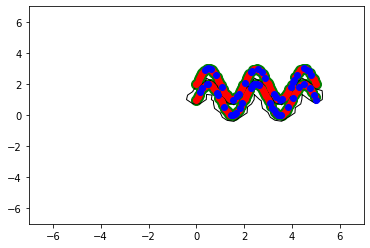

In [21]:

model.plot_contour(X_train, X_test, kernel, sv, sv_y, alphas, w, b)

In [22]:
resolution = 100
x_series = np.linspace(0,5,resolution)
y_series = np.linspace(0,3.5,resolution)

x_mesh,y_mesh = np.meshgrid(x_series,y_series)

x_mesh = x_mesh.reshape(-1,1)
y_mesh = y_mesh.reshape(-1,1)

mesh = np.append(x_mesh,y_mesh,axis=1)
y_pred = model.predict(mesh,kernel,sv,sv_y,alphas,w,b).astype(int)

x_mesh = x_mesh.reshape(resolution,resolution)
y_mesh = y_mesh.reshape(resolution,resolution)
y_pred = y_pred.reshape(resolution,resolution)

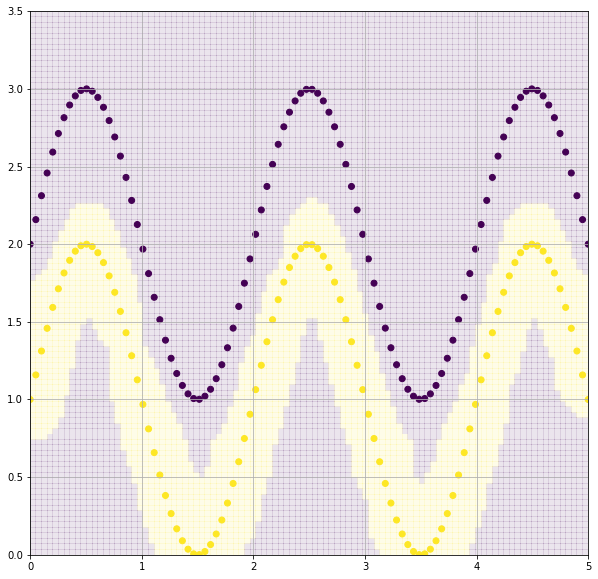

In [23]:

plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y)
plt.pcolormesh(x_mesh,y_mesh,y_pred,cmap='viridis',shading='auto',alpha=0.1)
plt.grid(True)